<h2>Objectives</h2>

- What was the developers Profession and formal education ?
- which Countries data was collected from during survey?
- How satisfied were the working professionals?
- How education may influence the salary?
- The rate of increase in salary with the years of experience



In [19]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [20]:
# Importing Dataset 
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

# Creating copies of original dataset
question_1 = df.copy(deep=True)
question_2 = df.copy(deep=True)
df.shape

(51392, 154)

In [21]:
def get_description(column_name, schema=schema):
    '''
    SUMMARY: 
            Returns the description of a column
    INPUT:
            schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT: 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

In [22]:
def grouping_function(data, column_name):
    """ 
    SUMMARY: 
            Returns a grouped dataframe
    
    INPUT: 
            data (object): 2-D Dataframe
            column_name (char): Column which is to be grouped by
  
    Returns: 
            GroupBy object with mean
    """
    
    grouped_df = data.groupby([column_name]).mean().reset_index()
    return grouped_df

In [23]:
def plot_graph(data, x_data, y_data):
    """ 
    SUMMARY: 
            Plot y versus x as lines and/or markers.
    
    INPUT: 
            data (object): 2-D Dataframe
            x_data (char): Data Column for x-axis
            y_data (char): Data Column for y-axis
  
    OUTPUT: 
            Axes Instance
    """
    
    ax = data.plot.barh(x=x_data, y=y_data, rot=0)
    return ax

<h2>1.What was the developers Profession and formal education?</h2>

In [47]:
profession_dev=df['Professional'].value_counts() #counts different number of professionals
profession_dev

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

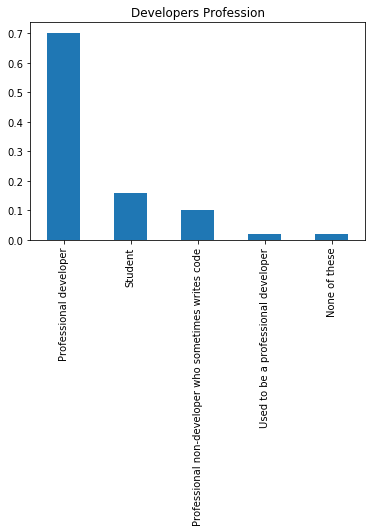

In [48]:
(profession_dev/df.shape[0]).plot(kind='bar')
plt.title("Developers Profession");

<h2>2.which Countries data was collected from during survey?</h2>

In [65]:
country=df['Country'].value_counts() #counts top (20) distinct countries from the dataset
country.head(20)

United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Netherlands             855
Italy                   781
Brazil                  777
Sweden                  611
Switzerland             595
Israel                  575
Romania                 561
Iran                    507
Austria                 477
Pakistan                454
Name: Country, dtype: int64

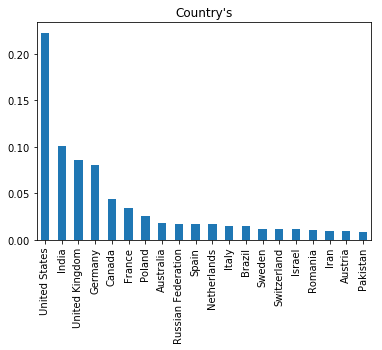

In [66]:
(country[:20]/df.shape[0]).plot(kind='bar')
plt.title("Country's");


<h2>3. How satisfied were the working professionals?</h2>

In [71]:
job_satisfaction=df.groupby(['FormalEducation']).mean()['JobSatisfaction'].sort_values().dropna() 
job_satisfaction

FormalEducation
I never completed any formal education                               6.833333
Bachelor's degree                                                    6.866363
Master's degree                                                      6.953151
Primary/elementary school                                            6.956897
I prefer not to answer                                               7.005682
Some college/university study without earning a bachelor's degree    7.081334
Professional degree                                                  7.087459
Secondary school                                                     7.143082
Doctoral degree                                                      7.348857
Name: JobSatisfaction, dtype: float64

In the code cell above I dropped the rows with nan in JobSatisfaction column because here we cannot impute the nan values in the JobSatisfaction column with mean or mode of the column as there are about 20% of the data in Jobsatisfaction column which belongs to nan and it contiutes to a large amount of data which can change our entire analysis. Also imputing with mean or mode may prove to be absurd as each person will have its own choice of rating for satisfaction and we cannot rely on mean or mode values for that as a person may have too less or too large rating as compared to mean and mode of the column.

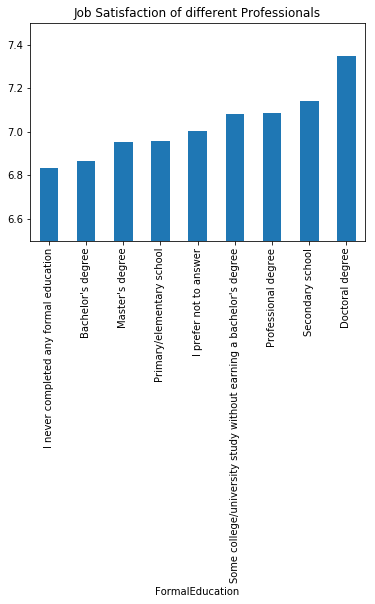

In [74]:
(job_satisfaction).plot(kind='bar')
plt.ylim(6.5, 7.5)
plt.title('Job Satisfaction of different Professionals')

<h2>4. How education may influence the salary?</h2>

We need to find the average salary of each education entry. Let's get the description of some relevant columns according to our requirement:

In [52]:
print(get_description('FormalEducation'))
print(get_description('Salary'))

Which of the following best describes the highest level of formal education that you've completed?
What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?


For this objective, **FormalEducation** and **Salary** column seems to be best fit to our need. So, we are going to go ahead with these two columns

In [78]:
result_1 = grouping_function(question_1, 'FormalEducation')
result_1[['FormalEducation', 'Salary']]

,FormalEducation,Salary
0,Bachelor's degree,56914.358553
1,Doctoral degree,78527.933053
2,I never completed any formal education,44430.660621
3,I prefer not to answer,38284.836141
4,Master's degree,58250.838766
5,Primary/elementary school,62677.337356
6,Professional degree,39503.658863
7,Secondary school,40395.148419
8,Some college/university study without earning ...,55912.810459


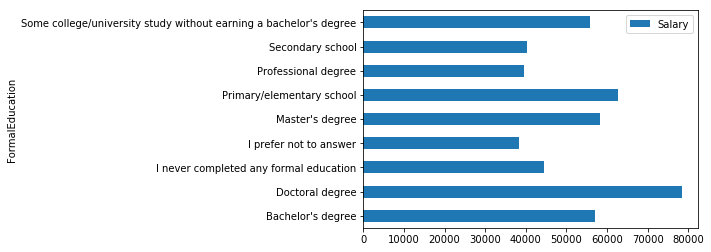

In [54]:
# Visualisation for objective 1
ax1 = plot_graph(result_1, 'FormalEducation', 'Salary')

**Summary:** The developers who own a Doctoral Degree get the highest salary of USD 78,527, followed by Primary/Elementary School graduates at USD 62,677 and Master's Degree holder at normal pay of USD 58,250.

<h2>5. Rate of increase of salary with years of experience</h2>

First step is to choose the column of our need. Let's have a look on **YearsProgram** and **Salary** column:

In [55]:
print(get_description('YearsProgram'))
print(get_description('Salary'))

How long has it been since you first learned how to program?
What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?


Here we will use the year when any individual learned first program. Let's not confused it with the number of years an individual has been in the industry professionally. We will use our _groupby_ function to group the **YearsProgram** with the average of **Salary**

In [56]:
result_2 = grouping_function(question_2, 'YearsProgram')
result_2[['YearsProgram', 'Salary']]

,YearsProgram,Salary
0,1 to 2 years,35625.727186
1,10 to 11 years,47723.234743
2,11 to 12 years,55617.139567
3,12 to 13 years,56225.344348
4,13 to 14 years,56449.998540
5,14 to 15 years,63527.583591
6,15 to 16 years,63149.645686
7,16 to 17 years,65109.493505
8,17 to 18 years,74186.535157
9,18 to 19 years,70397.724801


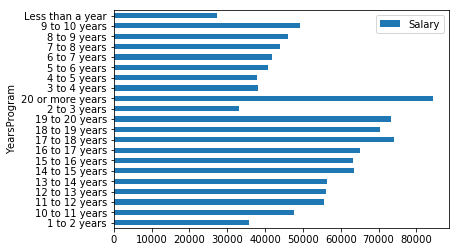

In [69]:
# Visualisation for objective 3
ax2 = plot_graph(result_2, 'YearsProgram', 'Salary')

**Summary:** With no surprise, the pattern is linear over the number of years of experience. Those very new to the tech industry, with less than a year of experience, can expect to get a normal pay of USD 24,673 (a year-over-year increment of 12.16 percent). Following a year or two, that normal pay hops to USD 33,953 (a whopping 37.6 percent expansion, year-over-year).